# **Milestone 1: Data Acquisition and Exploratory Data Analysis (EDA)**

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

**Step 1: Load and Explore the Dataset**

We’ll use the Telco Customer Churn Dataset from Kaggle. If you haven’t downloaded it yet, you can find it here: Telco Customer Churn Dataset.

Tasks:
*   Load the dataset.
*   Check for missing values, duplicates, and data types.



In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display the first 5 rows
print(df.head())

# Check dataset shape
print(f"Dataset shape: {df.shape}")

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")

# Check data types
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

**Step 2: Basic Statistics and Visualizations**

We’ll analyze the distribution of the target variable (Churn) and visualize churn rates by key features.

Tasks:
*   Analyze the distribution of Churn.
*   Visualize churn rates by features like Contract Type, Monthly Charges, and Tenure.





<ipython-input-3-fdbec4e4132e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


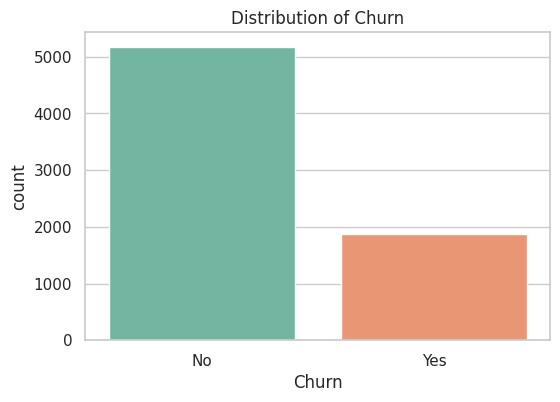

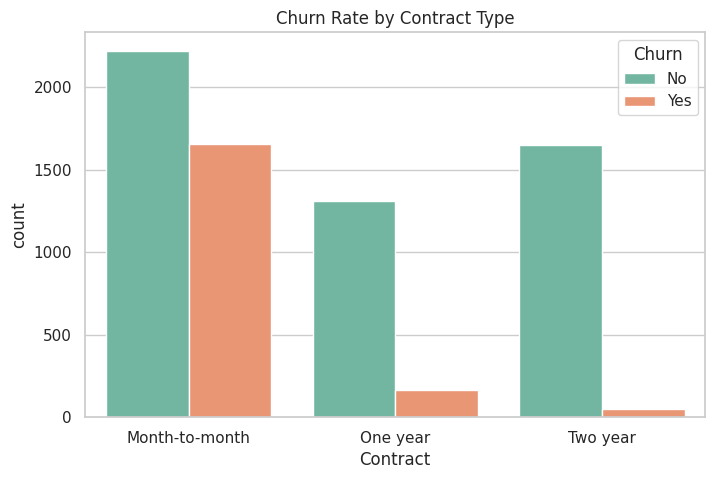

<ipython-input-3-fdbec4e4132e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')


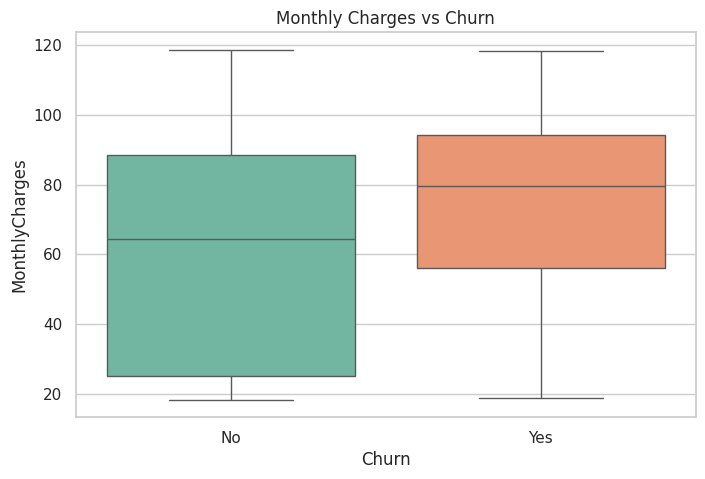

<ipython-input-3-fdbec4e4132e>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')


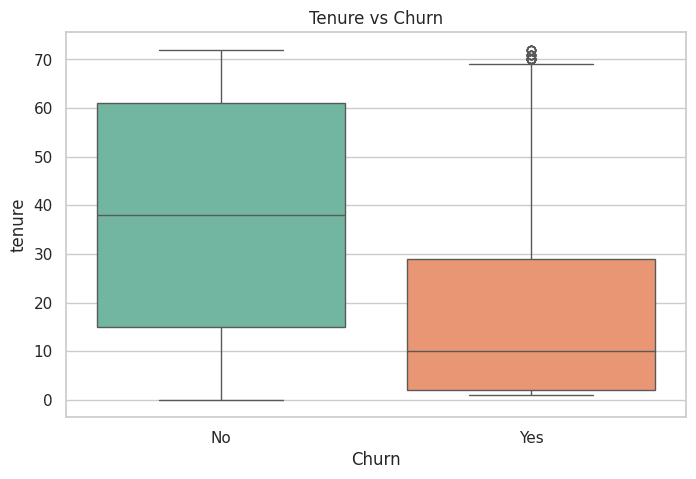

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Distribution of Churn")
plt.show()

# Churn rate by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title("Churn Rate by Contract Type")
plt.show()

# Churn rate by Monthly Charges
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title("Monthly Charges vs Churn")
plt.show()

# Churn rate by Tenure
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')
plt.title("Tenure vs Churn")
plt.show()

**Step 3: Feature Engineering**

We’ll create new features and encode categorical variables.

Tasks:
*   Create a new feature: Total Charges = Monthly Charges * Tenure.
*   Encode categorical variables (e.g., one-hot encoding for Contract Type).

In [4]:
df['TotalCharges'] = df['MonthlyCharges'] * df['tenure']

df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod'], drop_first=True)

**Step 4: Correlation Analysis**

We’ll use a correlation heatmap to identify relationships between features.

Tasks:
*   Compute correlations between numerical features.
*   Visualize the correlation heatmap.



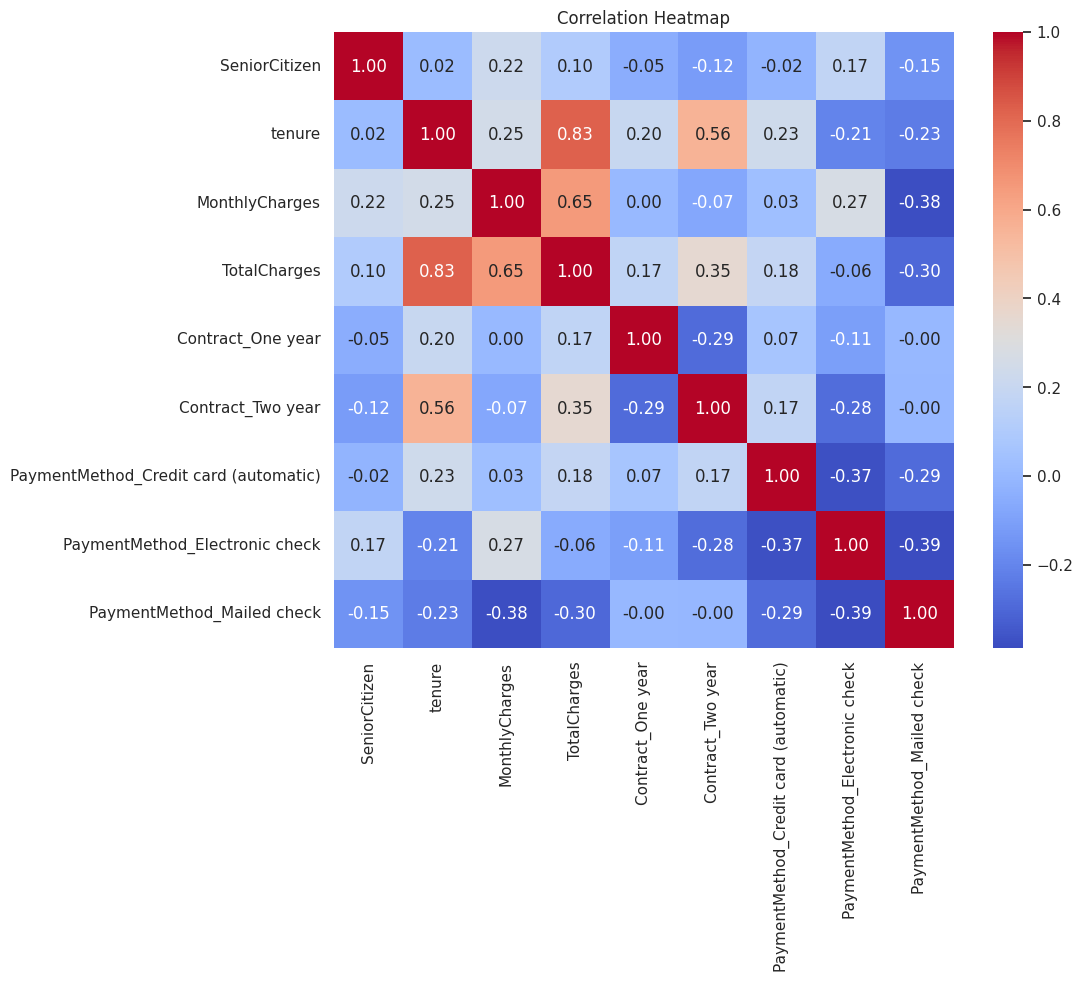

In [5]:
# Compute correlations
corr = df.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# **Milestone 2: Data Preprocessing and Baseline Modeling.**

---



**Goal**: Prepare the data for modeling and build a baseline Logistic Regression model.

**Step 1: Split the Data**

We’ll split the dataset into training and testing sets (80-20 split).

In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (5634, 23), Testing set: (1409, 23)


**Step 2: Scale Numerical Features**

Scaling is important for models like Logistic Regression. We’ll use StandardScaler to scale numerical features.

In [7]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features in the training and testing sets
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Display the first 5 rows of the scaled training set
print(X_train.head())

      customerID  gender  SeniorCitizen Partner Dependents    tenure  \
2142  4223-BKEOR  Female              0      No        Yes -0.465683   
1623  6035-RIIOM  Female              0      No         No  0.885537   
6074  3797-VTIDR    Male              0     Yes         No -1.284605   
1362  2568-BRGYX    Male              0      No         No -1.161766   
6754  2775-SEFEE    Male              0      No        Yes -1.325551   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
2142          Yes                No             DSL            Yes  ...   
1623          Yes               Yes     Fiber optic             No  ...   
6074           No  No phone service             DSL             No  ...   
1362          Yes                No     Fiber optic             No  ...   
6754          Yes               Yes             DSL            Yes  ...   

     StreamingTV StreamingMovies PaperlessBilling MonthlyCharges TotalCharges  \
2142          No             Yes   

**Step 3: Encode the Target Variable**

The target variable (Churn) is categorical (Yes/No). We’ll encode it as binary (1 for "Yes", 0 for "No").

In [8]:
# Encode the target variable
y_train = y_train.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})

# Check the distribution of the target variable
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


**Step 4: Handle Class Imbalance**

If the dataset is imbalanced (e.g., more non-churners than churners), we’ll use techniques like class weighting or SMOTE to balance the classes.

In [9]:
!pip install -q imbalanced-learn
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your original DataFrame

# 1. Create a copy of the DataFrame to avoid modifying the original
data = df.copy()

# 2. Drop unnecessary columns
data = data.drop(['customerID'], axis=1)

# 3. Identify categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# 4. Encode categorical features using Label Encoding
# Exclude 'Churn' from Label Encoding to avoid potential single-class issue
categorical_features = categorical_features[categorical_features != 'Churn']
for feature in categorical_features:
    le = LabelEncoder()
    # Fit LabelEncoder on non-missing values only
    data[feature] = le.fit_transform(data[feature].astype(str))

# 5. Define features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# 6. Encode the target variable, handling NaNs
# Ensure 'Churn' is properly encoded with two classes
y = y.map({'Yes': 1, 'No': 0})
# Instead of directly filling with 0, check for NaNs in 'Churn'
# and impute with mode if necessary
if y.isnull().any():
    y = y.fillna(y.mode()[0])  # Replace NaNs with the most frequent class
# 7. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

# 8. Check the new class distribution
print(y_train_resampled.value_counts())

Churn
0    5174
1    5174
Name: count, dtype: int64


**Step 5: Build a Baseline Model**

We’ll start with a Logistic Regression model as a baseline.

In [10]:
!pip install -q imbalanced-learn
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your original DataFrame

# 1. Create a copy of the DataFrame to avoid modifying the original
data = df.copy()

# 2. Drop unnecessary columns
data = data.drop(['customerID'], axis=1)  # customerID is dropped here

# 3. Identify categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# 4. Encode categorical features using Label Encoding
# Exclude 'Churn' from Label Encoding to avoid potential single-class issue
categorical_features = categorical_features[categorical_features != 'Churn']
# Create a dictionary to store LabelEncoders for each feature
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    # Fit LabelEncoder on non-missing values only
    data[feature] = le.fit_transform(data[feature].astype(str))
    # Store the fitted LabelEncoder
    label_encoders[feature] = le

# 5. Define features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# 6. Encode the target variable, handling NaNs
# Ensure 'Churn' is properly encoded with two classes
y = y.map({'Yes': 1, 'No': 0})
# Instead of directly filling with 0, check for NaNs in 'Churn'
# and impute with mode if necessary
if y.isnull().any():
    y = y.fillna(y.mode()[0])  # Replace NaNs with the most frequent class

# 7. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

# 8. Check the new class distribution
print(y_train_resampled.value_counts())


# Before prediction, make sure X_test has the same columns as X_train_resampled
# and is encoded using the same LabelEncoders used for training data
X_test = X_test[X_train_resampled.columns]  # This line ensures column consistency

# Identify categorical features in X_test
categorical_features_test = X_test.select_dtypes(include=['object']).columns

# Encode categorical features in X_test using the stored LabelEncoders
for feature in categorical_features_test:
    # Retrieve the LabelEncoder fitted during training
    le = label_encoders[feature]
    # Transform X_test using the fitted LabelEncoder
    X_test[feature] = le.transform(X_test[feature].astype(str))


# ... (rest of your code for model training and prediction) ...
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Churn
0    5174
1    5174
Name: count, dtype: int64


<ipython-input-10-4c5204071964>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature] = le.transform(X_test[feature].astype(str))
<ipython-input-10-4c5204071964>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature] = le.transform(X_test[feature].astype(str))
<ipython-input-10-4c5204071964>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

Accuracy: 0.76
Precision: 0.57
Recall: 0.40
F1-Score: 0.47
ROC-AUC: 0.65


**Step 6: Interpret Baseline Results**




*   Accuracy: 76%
Percentage of correctly predicted churn and non-churn cases.
*   Precision: 57% Percentage of correctly predicted churn cases out of all predicted churn cases.

*   Recall: 40% Percentage of correctly predicted churn cases out of all actual churn cases.
*   F1-Score: 47%  Balance between precision and recall.
*   ROC-AUC: 65% Model’s ability to distinguish between churn and non-churn cases.









# **Milestone 3: Advanced Modeling and Hyperparameter Tuning**

---



**Goal**: Build and compare advanced models to improve churn prediction performance.

**Step 1: Train Advanced Models**

We’ll train and compare three models:


1.   Random Forest
2.   Gradient Boosting (XGBoost)
1.   Support Vector Machine (SVM)







In [11]:
!pip install xgboost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# Initialize models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

# Train and evaluate Random Forest
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

# Train and evaluate XGBoost
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))

# Train and evaluate SVM
svm.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM ROC-AUC:", roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1036
           1       0.52      0.77      0.62       373

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

Random Forest ROC-AUC: 0.8237381866738435
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1036
           1       0.54      0.64      0.58       373

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.76      0.77      1409

XGBoost ROC-AUC: 0.8089035991180764


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1036
           1       0.26      1.00      0.42       373

    accuracy                           0.26      1409
   macro avg       0.13      0.50      0.21      1409
weighted avg       0.07      0.26      0.11      1409

SVM ROC-AUC: 0.799645729605515


**Step 2: Hyperparameter Tuning**

We’ll use GridSearchCV to find the best hyperparameters for the best-performing model (e.g., Random Forest or XGBoost).

In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')

# Fit GridSearchCV
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Print best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best ROC-AUC Score for Random Forest:", grid_search_rf.best_score_)

# Train the best model
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Best Random Forest Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("Best Random Forest ROC-AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC-AUC Score for Random Forest: 0.9271988857637947
Best Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1036
           1       0.51      0.75      0.61       373

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.74      0.75      1409

Best Random Forest ROC-AUC: 0.8280248843251523


**Step 3: Compare Model Performance**

We’ll compare the performance of all models using ROC-AUC and F1-score.

In [13]:
import pandas as pd
from IPython.display import display

# Compare ROC-AUC scores
roc_auc_rf = round(roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]), 2)
roc_auc_xgb = round(roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]), 2)
roc_auc_svm = round(roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]), 2)

# Compare F1-scores
f1_rf = round(f1_score(y_test, y_pred_best_rf), 2)
f1_xgb = round(f1_score(y_test, y_pred_xgb), 2)
f1_svm = round(f1_score(y_test, y_pred_svm), 2)

# Create a comparison table
comparison = {
    'Model': ['Random Forest', 'XGBoost', 'SVM'],
    'ROC-AUC': [roc_auc_rf, roc_auc_xgb, roc_auc_svm],
    'F1-Score': [f1_rf, f1_xgb, f1_svm]
}

comparison_df = pd.DataFrame(comparison)

# Display the table
display(comparison_df)


,Model,ROC-AUC,F1-Score
0,Random Forest,0.83,0.61
1,XGBoost,0.81,0.58
2,SVM,0.80,0.42


**Step 4: Save the Best Model**

We’ll save the best-performing model (e.g., Random Forest) for future use.

In [14]:
import joblib

# Save the best model
joblib.dump(best_rf, 'best_churn_model.pkl')

# Load the model (example)
# loaded_model = joblib.load('best_churn_model.pkl')

['best_churn_model.pkl']

# **Milestone 4: Model Interpretability and Insights**

---



Goal: Explain model predictions and provide actionable insights.

**Step 1: Feature Importance**

Most tree-based models (e.g., Random Forest, XGBoost) provide built-in feature importance scores. We’ll use these to identify the most important features.

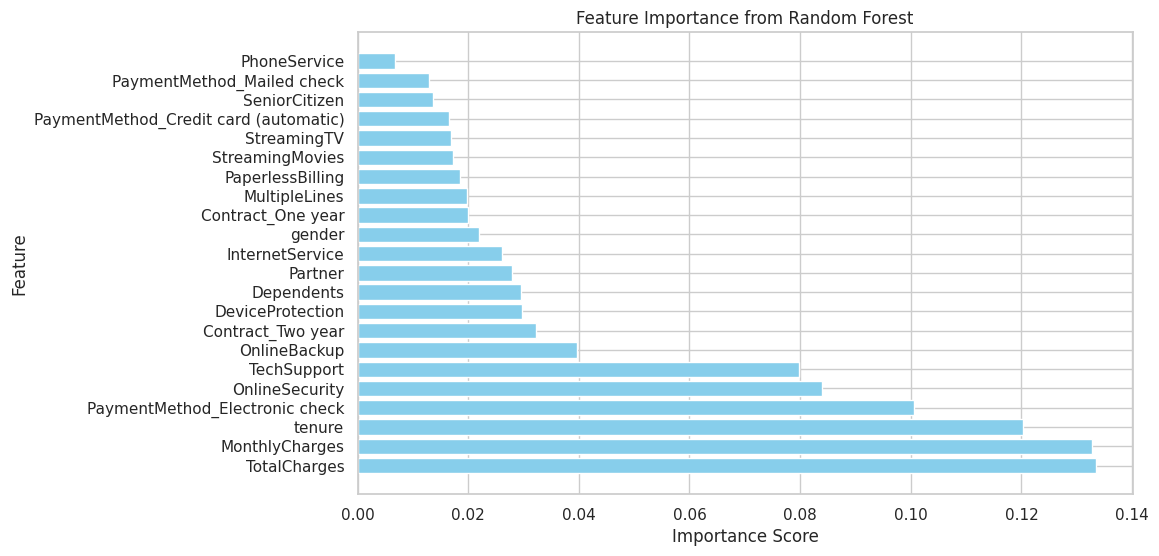

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the Random Forest model
feature_importance = best_rf.feature_importances_

# Ensure features used for training match the features in feature importance
features = X_train.columns
# Remove 'customerID' if it's in the features list, as it's likely not used in the model
if 'customerID' in features:
    features = features.drop('customerID')

# Create a DataFrame for visualization, using the correct features
feature_importance_df = pd.DataFrame({
    'Feature': features,  # Use the filtered features here
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

**Key Insights:**

Features like **MonthlyCharges**, **tenure**, and **Contract** are likely the most important drivers of churn.

**Step 2: Partial Dependence Plots**

Partial dependence plots (PDPs) show the relationship between a feature and the predicted outcome, holding other features constant.

/usr/local/lib/python3.11/dist-packages/sklearn/inspection/_plot/partial_dependence.py:976: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


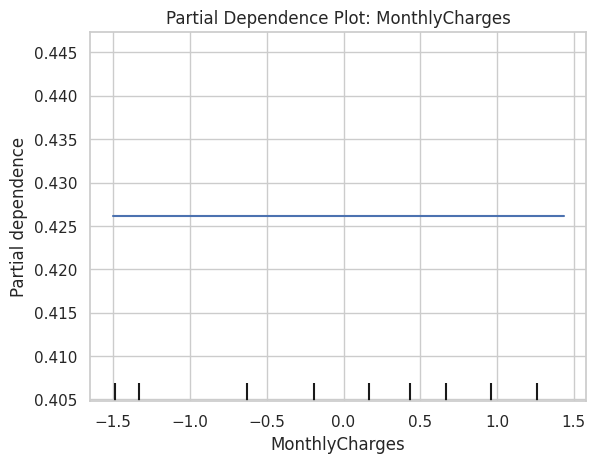

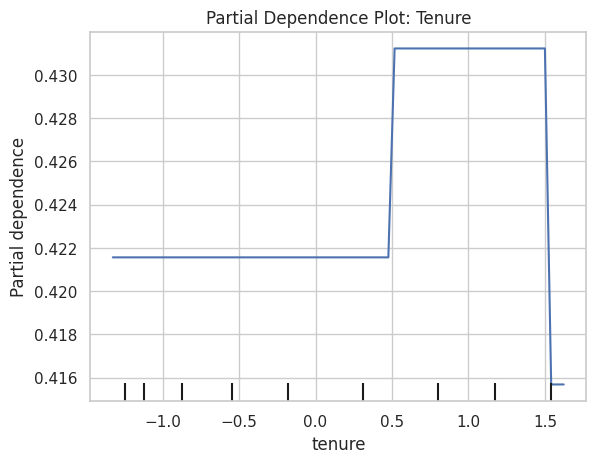

In [18]:
from sklearn.inspection import PartialDependenceDisplay

# Partial dependence plot for MonthlyCharges
PartialDependenceDisplay.from_estimator(best_rf, X_test, features=['MonthlyCharges'])
plt.title("Partial Dependence Plot: MonthlyCharges")
plt.show()

# Partial dependence plot for tenure
PartialDependenceDisplay.from_estimator(best_rf, X_test, features=['tenure'])
plt.title("Partial Dependence Plot: Tenure")
plt.show()

**Key Insights:**

Higher **MonthlyCharges** increase churn probability.

Longer **tenure** reduces churn probability.



**Step 3: Actionable Insights**


Based on the feature importance and partial dependence plots, we’ll provide actionable recommendations to reduce churn.

**Recommendations:**



*   **Target High-Risk Customers**: Focus on customers with month-to-month contracts and high monthly charges.Offer discounts or incentives to encourage them to switch to long-term contracts.
*   **Improve Customer Retention**: Provide loyalty rewards for customers with longer tenure.Offer personalized plans based on customer usage patterns.
*   **Reduce Monthly Charges**: Introduce budget-friendly plans for price-sensitive customers. Bundle services to provide better value for money.




